# Bài tập trực quan dữ liệu: Dùng dữ liệu Canada vẽ line, area, bar, pie, scatter dùng hàm plot(*args, **kwargs); Tìm hiểu cách vẽ dùng seborn

In [18]:
# cài đặt thư viện và import 
!pip install openpyxl seaborn xlrd


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

In [20]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
df_can.shape

(195, 43)

In [21]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [22]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [23]:
# OdName làm index 
df_can.set_index('OdName', inplace=True)

# Lấy dữ liệu Haiti từ 1980 đến 2013
haiti = df_can.loc['Haiti', 1980:2013]
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

# Biểu đồ đường 

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

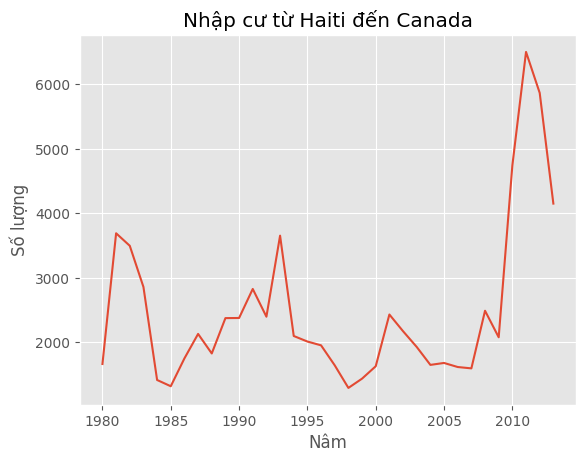

In [25]:
haiti.plot(kind='line')

plt.title('Nhập cư từ Haiti đến Canada')
plt.ylabel('Số lượng')
plt.xlabel('Nâm')

plt.show()

In [26]:
# Lấy dữ liệu nhập cư từ Việt Nam (Vietnam) và Sri Lanka từ 1990 đến 2013
vietnam = df_can.loc['Viet Nam', 1990:2013]
srilanka = df_can.loc['Sri Lanka', 1990:2013]

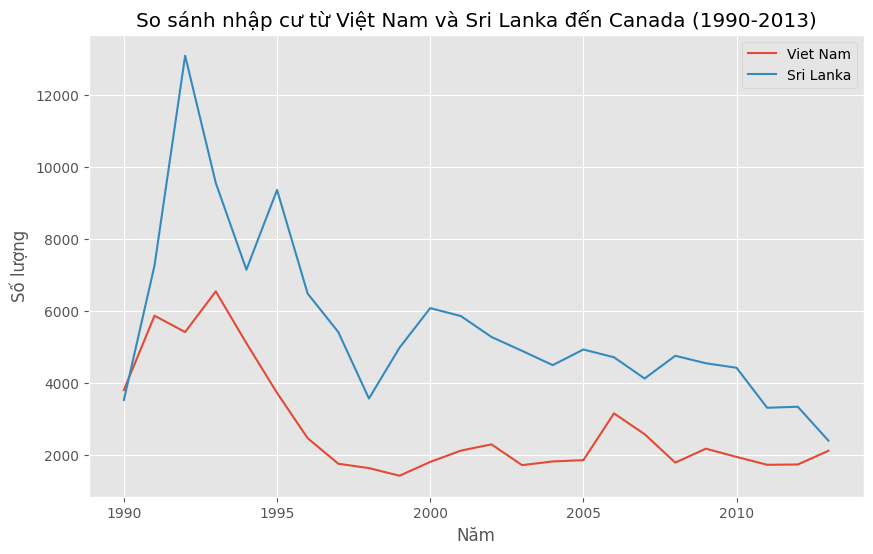

In [27]:
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ đường cho Việt Nam
vietnam.plot(kind='line')
# Vẽ biểu đồ đường cho Sri Lanka
srilanka.plot(kind='line')

plt.title('So sánh nhập cư từ Việt Nam và Sri Lanka đến Canada (1990-2013)')
plt.ylabel('Số lượng')
plt.xlabel('Năm')

# Hiển thị lưới và biểu đồ
plt.legend()
plt.show()

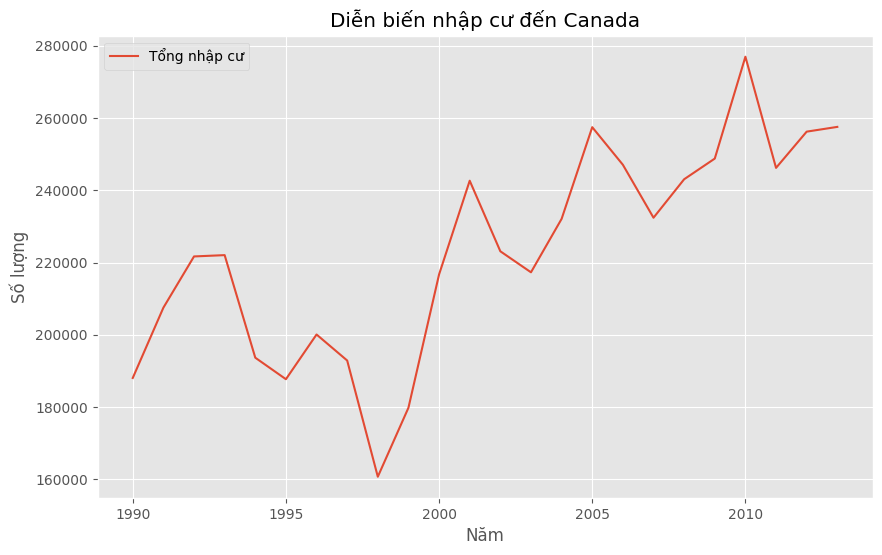

In [28]:
# Tính tổng số lượng nhập cư theo từng năm
immigration_by_year = df_can.loc[:, 1990:2013].sum()

# Vẽ biểu đồ xu hướng nhập cư
plt.figure(figsize=(10, 6))
plt.plot(immigration_by_year.index, immigration_by_year.values, label='Tổng nhập cư')
plt.title('Diễn biến nhập cư đến Canada')
plt.ylabel('Số lượng')
plt.xlabel('Năm')
plt.legend()
plt.show()

In [29]:
print(df_can.dtypes)


Type        object
Coverage    object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object


In [30]:
df_can['Total'] = df_can.loc[:, 1980:2013].sum(axis=1)

In [31]:
df_can.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


In [32]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df_can.head()
df_top5 = df_top5.loc[:, 1980:2013].transpose()

In [33]:
df_top5.head()

OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


# Biểu đồ miền

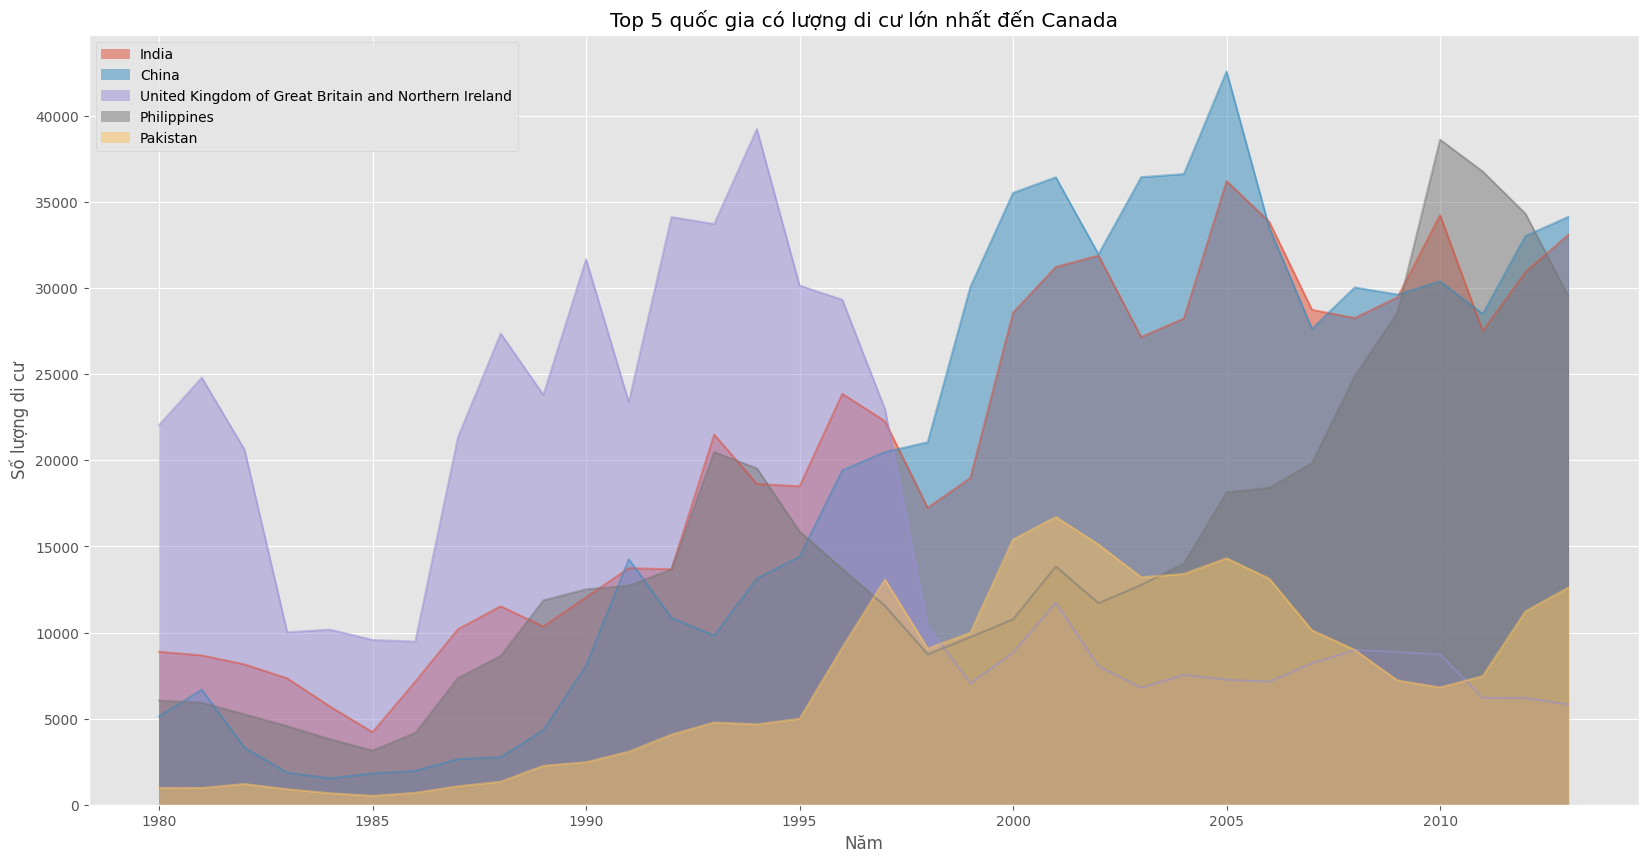

In [35]:
df_top5.plot(kind='area', stacked=False, figsize=(20, 10),)

plt.title('Top 5 quốc gia có lượng di cư lớn nhất đến Canada')
plt.ylabel('Số lượng di cư')
plt.xlabel('Năm')
plt.legend()
plt.show()

# Biểu đồ cột

In [36]:
df_viet = df_can.loc['Viet Nam', 1980:2013]
df_viet

1980    1191
1981    1829
1982    2162
1983    3404
1984    7583
1985    5907
1986    2741
1987    1406
1988    1411
1989    3004
1990    3801
1991    5870
1992    5416
1993    6547
1994    5105
1995    3723
1996    2462
1997    1752
1998    1631
1999    1419
2000    1803
2001    2117
2002    2291
2003    1713
2004    1816
2005    1852
2006    3153
2007    2574
2008    1784
2009    2171
2010    1942
2011    1723
2012    1731
2013    2112
Name: Viet Nam, dtype: object

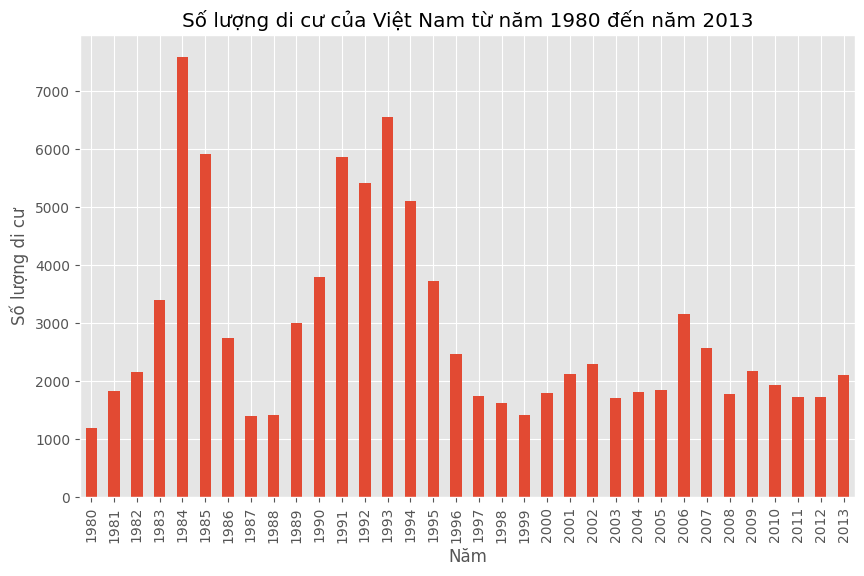

In [37]:
df_viet.plot(kind='bar', figsize=(10, 6))

plt.title('Số lượng di cư của Việt Nam từ năm 1980 đến năm 2013')
plt.ylabel('Số lượng di cư')
plt.xlabel('Năm')
plt.show()

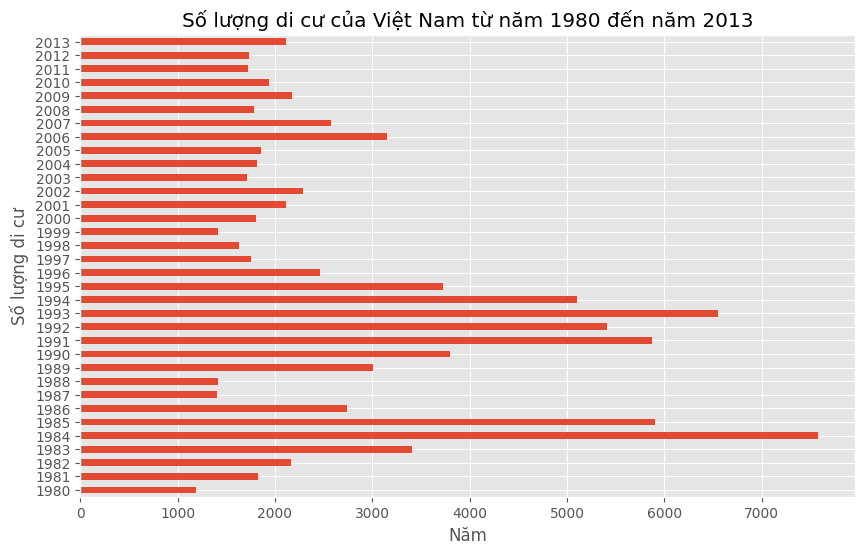

In [38]:
df_viet.plot(kind='barh', figsize=(10, 6))

plt.title('Số lượng di cư của Việt Nam từ năm 1980 đến năm 2013')
plt.ylabel('Số lượng di cư')
plt.xlabel('Năm')
plt.show()

In [ ]:
# Biểu đồ tròn

In [39]:
df_continents = df_can.groupby('AreaName', axis=0).sum()
df_continents

/tmp/ipykernel_92080/1125122883.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continents = df_can.groupby('AreaName', axis=0).sum()


,Type,Coverage,AREA,REG,RegName,DEV,DevName,1980,1981,1982,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
AreaName,,,,,,,,,,,,,,,,,,,,,
Africa,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,48762,49242,Northern AfricaNorthern AfricaNorthern AfricaE...,48708,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,45815,109147,Southern AsiaEastern AsiaSouth-Eastern AsiaSou...,44197,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,39044,39754,Northern EuropeEastern EuropeWestern EuropeEas...,38743,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,29832,30395,CaribbeanCaribbeanSouth AmericaSouth AmericaCe...,29766,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,ImmigrantsImmigrants,ForeignersCitizens,1810,1810,Northern AmericaNorthern America,1802,Developed regionsDeveloped regions,9378,10030,9074,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,ImmigrantsImmigrantsImmigrantsImmigrantsImmigr...,ForeignersForeignersForeignersForeignersForeig...,12726,13210,Australia and New ZealandMelanesiaAustralia an...,12626,Developed regionsDeveloping regionsDeveloped r...,1942,1839,1675,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


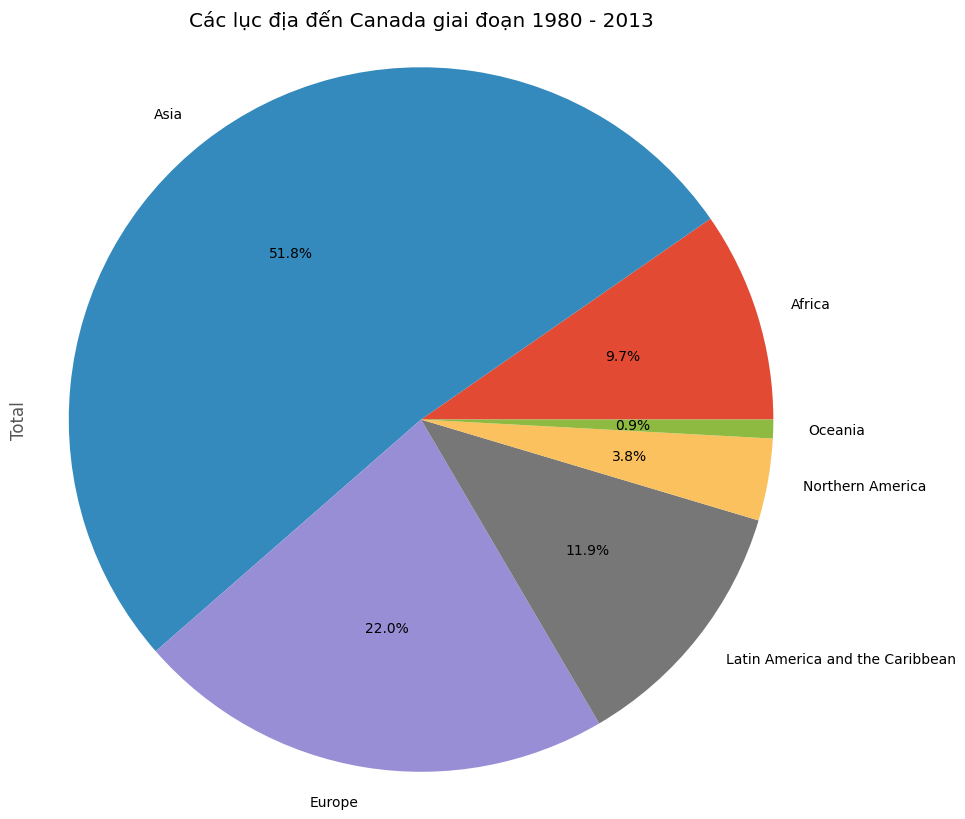

In [80]:
df_continents['Total'].plot(kind='pie',
                            figsize=(10, 10),
                            autopct='%1.1f%%',)

plt.title('Các lục địa đến Canada giai đoạn 1980 - 2013')
plt.axis('equal')
plt.show()

# Biểu đồ phân tán

In [86]:
df_sum = pd.DataFrame(df_can.loc[:, 1980:2013].sum(axis=0))
df_sum.reset_index(inplace = True)
df_sum.columns = ['year', 'total']

df_sum.head(10)

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


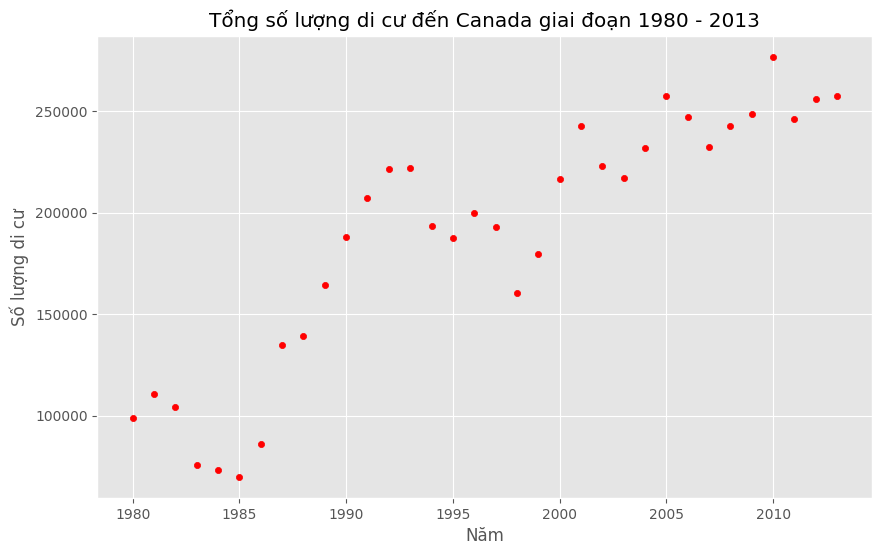

In [87]:
df_sum.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='red')

plt.title('Tổng số lượng di cư đến Canada giai đoạn 1980 - 2013')
plt.ylabel('Số lượng di cư')
plt.xlabel('Năm')
plt.show()
